# Read and Write Raster Data using GDAL

In [1]:
# import libraries
import os
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define path for raster files
os.chdir(r'D:\programmes\other\Washington')
band1_fn = 'p047r027_7t20000730_z10_nn10.tif'
band2_fn = 'p047r027_7t20000730_z10_nn20.tif'
band3_fn = 'p047r027_7t20000730_z10_nn30.tif'

# Open file and read raster band
in_ds = gdal.Open(band1_fn)
in_band = in_ds.GetRasterBand(1)

# Get geotiff driver from gdal
gtiff_driver = gdal.GetDriverByName('GTiff')

# Create new tif file
out_ds = gtiff_driver.Create('nat_color.tif',in_band.XSize, in_band.YSize, 3, in_band.DataType)
out_ds.SetProjection(in_ds.GetProjection()) # Set projection of new file
out_ds.SetGeoTransform(in_ds.GetGeoTransform()) # Set transform

# Read file as array
in_data = in_band.ReadAsArray()
out_band = out_ds.GetRasterBand(3)
out_band.WriteArray(in_data)

# Reading band2 and writing to new file
in_ds = gdal.Open(band2_fn)
out_band = out_ds.GetRasterBand(2)
out_band.WriteArray(in_ds.ReadAsArray())

# Reading band3 and writing to new file
out_ds.GetRasterBand(1).WriteArray(gdal.Open(band3_fn).ReadAsArray())

# Clear Cache
out_ds.FlushCache()

# Computing Statistics
for i in range(1, 4):
    out_ds.GetRasterBand(i).ComputeStatistics(False)
out_ds.BuildOverviews('average', [2, 4, 8, 16, 32])
del out_ds # destroy new file

## Read output raster file

In [3]:
# Reading raster file
ds = gdal.Open("nat_color.tif")

# Get transform and projection of new file
gt = ds.GetGeoTransform()
proj = ds.GetProjection()
print(f"GeoTransform: {gt}")
print(f"Projection: {proj}")

# Get band and read as array
band = ds.GetRasterBand(1)
array = band.ReadAsArray()

GeoTransform: (343724.25, 28.5, 0.0, 5369585.25, 0.0, -28.5)
Projection: PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32610"]]


### Output Raster Image

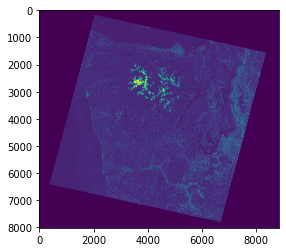

In [4]:
# Plot raster image using matplotlib
plt.figure()
plt.imshow(array)

In [5]:
# Show output raster data as numpy array
np.histogram(array)

(array([34558096, 30826322,  4065390,   989451,   218129,    74443,
           41464,    28539,    25605,   168088], dtype=int64),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]))

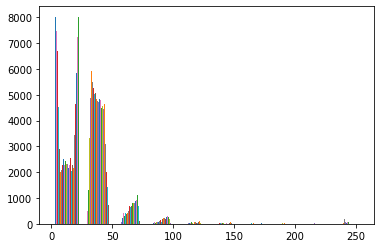

In [6]:
# Plot output raster data histogram using matplotlib
plt.hist(array)
plt.show()